<a href="https://colab.research.google.com/github/madhuammulu8/backups/blob/main/H%26M_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

In [ ]:
articles = pd.read_csv("/content/drive/MyDrive/Omnithink.AI/H&M/articles.csv")
articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [ ]:
customers = pd.read_csv("/content/drive/MyDrive/Omnithink.AI/H&M/customers.csv")
customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Omnithink.AI/H&M/transactions_train.csv")

In [ ]:
df.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [ ]:
# df.iloc[0]

In [ ]:
df['day'] = pd.to_datetime(df['t_dat'])
df

,t_dat,customer_id,article_id,price,sales_channel_id,day
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,2018-09-20
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2,2018-09-20
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2,2018-09-20
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2,2018-09-20
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2,2018-09-20
...,...,...,...,...,...,...
31788319,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,929511001,0.059305,2,2020-09-22
31788320,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,891322004,0.042356,2,2020-09-22
31788321,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,918325001,0.043203,1,2020-09-22
31788322,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,833459002,0.006763,1,2020-09-22


In [ ]:
print(df['article_id'].nunique())
print(df['t_dat'].nunique())

104547
734


In [ ]:
df = df.drop('t_dat', axis=1)
df

,customer_id,article_id,price,sales_channel_id,day
0,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,2018-09-20
1,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2,2018-09-20
2,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2,2018-09-20
3,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2,2018-09-20
4,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2,2018-09-20
...,...,...,...,...,...
31788319,fff2282977442e327b45d8c89afde25617d00124d0f999...,929511001,0.059305,2,2020-09-22
31788320,fff2282977442e327b45d8c89afde25617d00124d0f999...,891322004,0.042356,2,2020-09-22
31788321,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,918325001,0.043203,1,2020-09-22
31788322,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,833459002,0.006763,1,2020-09-22


In [ ]:
temp3= df.copy()

temp3 = df[df['article_id']== 743123001] #73966

temp3


,customer_id,article_id,price,sales_channel_id,day
8876253,4331d62088f4809ac9fc120d385f8d72310550aa3c0d96...,743123001,0.022017,1,2019-04-17
8915320,2184cd485932cff3cb155f158bea838c9c84a4e73b9a1c...,743123001,0.023661,1,2019-04-18
8972201,496f2559d3defe5340d69c4659cb71bfffe3e56ffe7656...,743123001,0.022864,1,2019-04-19
8993758,af839b760610197de66d596df1081dfccb366a41e2047d...,743123001,0.025407,1,2019-04-19
9024067,3e740cd002ef16897a62ccc11faade6b5114048b626e8c...,743123001,0.025407,1,2019-04-20
...,...,...,...,...,...
30034516,e6a3675021913a6dac2b490643a251af51c5ad2c22ca56...,743123001,0.011847,2,2020-08-06
30034517,e6a3675021913a6dac2b490643a251af51c5ad2c22ca56...,743123001,0.011847,2,2020-08-06
30095115,5e421cf6e58370ea6be44ff0fa65fdf14bdcb14e9e150a...,743123001,0.011458,2,2020-08-08
30140390,e3557df4b80f95eede3a3001f0bb627802234d6e208310...,743123001,0.011847,2,2020-08-09


In [ ]:
startdate = temp3.iloc[0]['day']
finaldate =  pd.to_datetime('2020-09-22')

date_range = pd.date_range(start=startdate, end=finaldate, freq='W')

result_df1 = pd.DataFrame(columns=temp3.columns)

In [ ]:
result_df1

,customer_id,article_id,price,sales_channel_id,day


In [ ]:
for date in date_range:
    if not temp3['day'].isin([date]).any():
        previous_date = temp3['day'][temp3['day'] < date].max()
        rows_to_copy = temp3[temp3['day'] == previous_date].copy()
        rows_to_copy['day'] = date
        result_df1 = pd.concat([result_df1, rows_to_copy], ignore_index=True)
result_df1

,customer_id,article_id,price,sales_channel_id,day
0,3e740cd002ef16897a62ccc11faade6b5114048b626e8c...,743123001,0.025407,1,2019-04-21
1,6d755e8bffc97ba1c25eb1908ec4198f7a15c750897e9f...,743123001,0.023136,1,2019-04-21
2,85866f7e05f47011be240e1687d009f2eb557879a45fc0...,743123001,0.022864,1,2019-04-21
3,d615d8eaa556330593f5b41bd211696875637c2972051e...,743123001,0.022864,1,2019-04-21
4,617b1ca291984d5a151ab8c0cb2becb3dd1f482cef3e45...,743123001,0.018627,1,2019-05-12
...,...,...,...,...,...
64,31aae4d86efdb1ea207c48c5b65d648f57afb215cd2af8...,743123001,0.011847,2,2020-08-23
65,31aae4d86efdb1ea207c48c5b65d648f57afb215cd2af8...,743123001,0.011847,2,2020-08-30
66,31aae4d86efdb1ea207c48c5b65d648f57afb215cd2af8...,743123001,0.011847,2,2020-09-06
67,31aae4d86efdb1ea207c48c5b65d648f57afb215cd2af8...,743123001,0.011847,2,2020-09-13


In [ ]:
df2= df[['article_id', 'price']]

In [ ]:
from sklearn.model_selection import train_test_split

df2["article_id"] = (df2["article_id"]-df2["article_id"].min())/(df2["article_id"].max()-df2["article_id"].min())

df2["price"] = (df2["price"]-df2["price"].min())/(df2["price"].max()-df2["price"].min())

# print(df2["sales"].max())

x = df2[["article_id"]]
y = df2[["price"]]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)


import torch
import torch.nn as nn
import torch.optim as optim

print(x_train.dtypes)

<ipython-input-16-66860c2d95b5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["article_id"] = (df2["article_id"]-df2["article_id"].min())/(df2["article_id"].max()-df2["article_id"].min())
<ipython-input-16-66860c2d95b5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["price"] = (df2["price"]-df2["price"].min())/(df2["price"].max()-df2["price"].min())


article_id    float64
dtype: object


In [ ]:
x_train = torch.tensor(x_train.values, dtype=torch.float32)
x_test = torch.tensor(x_test.values, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.float32)

Epoch [10/100], Loss: 0.2091, Val Loss: 0.1960
Epoch [20/100], Loss: 0.1104, Val Loss: 0.1038
Epoch [30/100], Loss: 0.0626, Val Loss: 0.0593
Epoch [40/100], Loss: 0.0360, Val Loss: 0.0341
Epoch [50/100], Loss: 0.0214, Val Loss: 0.0204
Epoch [60/100], Loss: 0.0131, Val Loss: 0.0124
Epoch [70/100], Loss: 0.0081, Val Loss: 0.0077
Epoch [80/100], Loss: 0.0053, Val Loss: 0.0050
Epoch [90/100], Loss: 0.0035, Val Loss: 0.0034
Epoch [100/100], Loss: 0.0025, Val Loss: 0.0025


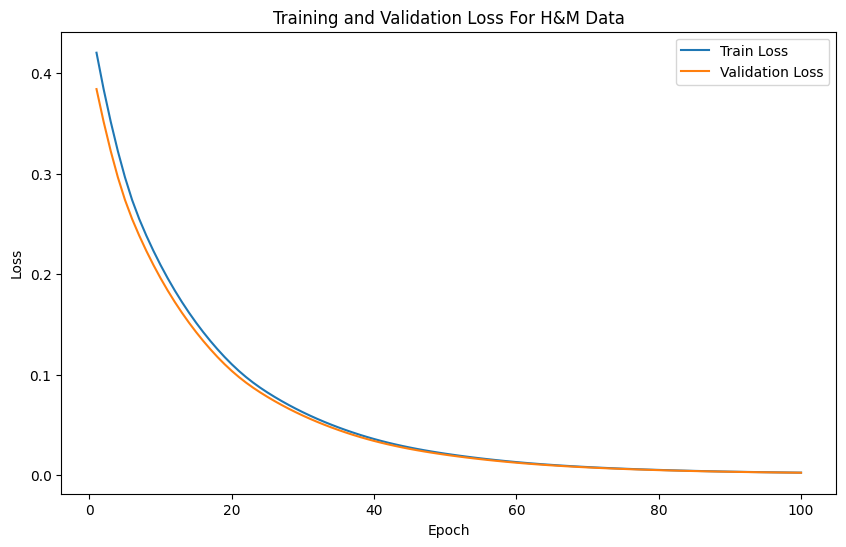

tensor([[299.4525],
        [288.7924],
        [299.3333],
        ...,
        [297.7770],
        [298.5652],
        [296.8092]], grad_fn=<MulBackward0>)
tensor([[ 88.5317],
        [ 80.1910],
        [150.5340],
        ...,
        [100.2890],
        [ 50.0440],
        [200.7790]])
Final Loss: 0.0025


In [ ]:

class RegressionModel(nn.Module):
    def __init__(self, input_size):
        super(RegressionModel, self).__init__()
        self.linear1 = nn.Linear(input_size, 5)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(5, 3)
        self.linear3 = nn.Linear(3, 1)

    def forward(self, x):
        x = self.relu(self.linear1(x))
        x = self.relu(self.linear2(x))
        x = self.linear3(x)
        return x

# Initialize the model
model = RegressionModel(input_size=x_train.shape[1])

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

train_losses = []
val_losses = []
train_maes = []
val_maes = []

# Training
num_epochs = 100
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(x_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())
    train_mae = mean_absolute_error(y_train.cpu().detach().numpy(), outputs.cpu().detach().numpy())
    train_maes.append(train_mae)

    model.eval()
    with torch.no_grad():
        val_outputs = model(x_test)
        val_loss = criterion(val_outputs, y_test)
        val_losses.append(val_loss.item())
        val_mae = mean_absolute_error(y_test.cpu().detach().numpy(), val_outputs.cpu().detach().numpy())
        val_maes.append(val_mae)

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')
    # print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Plotting loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.title('Training and Validation Loss For H&M Data')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


pred_y = model(x_test)

print(pred_y*3507)
print(y_test*3507)
loss = criterion(pred_y, y_test)
print(f'Final Loss: {loss.item():.4f}')

In [ ]:
final_train_mae = train_maes[-1]
final_val_mae = val_maes[-1]
print(f'Final Training MAE: {final_train_mae:.4f}')
print(f'Final Validation MAE: {final_val_mae:.4f}')

Final Training MAE: 0.0447
Final Validation MAE: 0.0439
0.04465865


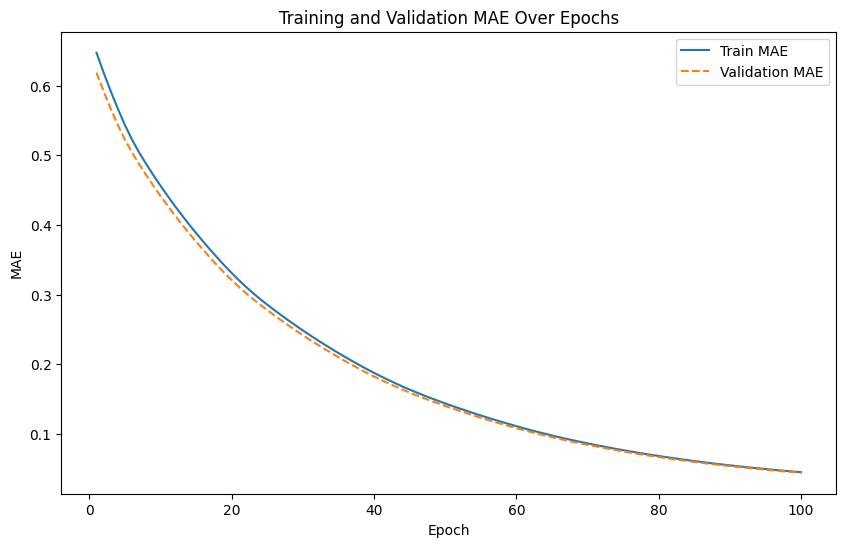

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_maes, label='Train MAE')
plt.plot(range(1, num_epochs + 1), val_maes, label='Validation MAE', linestyle='dashed')
plt.title('Training and Validation MAE Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()